In [162]:
import pandas as pd

df = pd.read_csv (r'C:\Users\HP\football\Erggg.csv')
     
        


In [163]:
df

,countries,totalgames,total_wins,total_loses,total_x,friendly_wins,friendly_loses,friendly_x,no_friendly_wins,no_friendly_loses,no_friendly_x,totalgames_2015_2021,total_wins_2015_2021,total_loses_2015_2021,total_x_2015_2021,total_goals_scored,total_goals_scored_in,total_goals_scored_2015_2021,total_goals_scored_in_2015_2021,category
0,Scotland,790,375,246,169,102,84,45,273,162,124,53,24,20,9,1364,972,79,67,Team_with_Fifa_Rank( 1--89)
1,England,1020,580,197,243,227,90,98,353,107,145,72,45,13,14,2230,999,146,53,Team_with_Fifa_Rank( 1--89)
2,Wales,667,215,309,143,49,73,34,166,236,109,58,28,17,13,832,1087,69,49,Team_with_Fifa_Rank( 1--89)
3,Northern Ireland,654,166,338,150,30,55,34,136,283,116,59,22,23,14,680,1233,62,62,Team_with_Fifa_Rank( 1--89)
4,United States,691,299,247,145,130,147,86,169,100,59,83,45,22,16,1020,918,166,84,Team_with_Fifa_Rank( 1--89)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Alderney,19,3,16,0,0,0,0,3,16,0,11,2,9,0,15,75,11,44,Team_with_Fifa_Rank( 180--269)
263,Sark,4,0,4,0,0,0,0,0,4,0,0,0,0,0,0,70,0,0,Team_with_Fifa_Rank( 180--269)
264,Western Isles,28,11,14,3,0,0,0,11,14,3,12,4,7,1,44,70,14,41,Team_with_Fifa_Rank( 180--269)
265,Kosovo,49,18,21,10,10,4,3,8,17,7,44,16,19,9,70,74,60,64,Team_with_Fifa_Rank( 90--179)


In [164]:
import sklearn
from sklearn.preprocessing import StandardScaler

features = ['totalgames','total_wins', 'total_loses', 'total_x','friendly_wins', 'friendly_loses', 'friendly_x','no_friendly_wins', 'no_friendly_loses', 'no_friendly_x', 'totalgames_2015_2021', 'total_wins_2015_2021', 'total_loses_2015_2021', 'total_x_2015_2021', 'total_goals_scored', 'total_goals_scored_in', 'total_goals_scored_2015_2021', 'total_goals_scored_in_2015_2021']


In [165]:
# Separating out the features
x = df.loc[:, features].values# Separating out the target
y = df.loc[:,['category']].values# Standardizing the features
x = StandardScaler().fit_transform(x)

In [166]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [167]:
finalDf = pd.concat([principalDf, df[['category']]], axis = 1)

In [168]:
targets=['Team_with_Fifa_Rank( 1--89)',
 'Team_with_Fifa_Rank( 90--179)',
 'Team_with_Fifa_Rank( 180--269)']

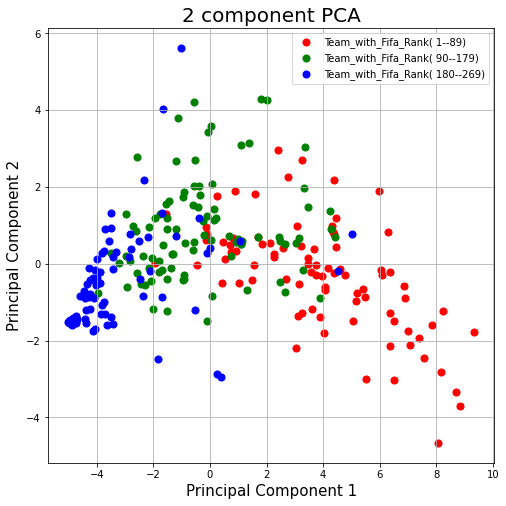

In [170]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = targets
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [178]:
print(abs( pca.components_ ))

[[0.26904089 0.25248827 0.24279034 0.26471413 0.24169945 0.2430893
  0.25357819 0.24748255 0.19964424 0.25361261 0.24348973 0.23940157
  0.14325894 0.21642175 0.25192302 0.24845356 0.23657054 0.14995457]
 [0.07786943 0.22793475 0.17687975 0.09884615 0.24121708 0.02786107
  0.13332776 0.20517368 0.32340439 0.05888717 0.20031001 0.08243513
  0.54890364 0.11251515 0.21565905 0.09123913 0.060394   0.50465552]]


In [156]:
#import csv

#fields = ['countries', 'totalgames', 'total_wins', 'total_loses', 'total_x', 'friendly_wins', 'friendly_loses', 'friendly_x', 'no_friendly_wins', 'no_friendly_loses', 'no_friendly_x', 'totalgames_2015_2021', 'total_wins_2015_2021', 'total_loses_2015_2021', 'total_x_2015_2021', 'total_goals_scored', 'total_goals_scored_in', 'total_goals_scored_2015_2021', 'total_goals_scored_in_2015_2021', 'category']
#with open('Erggg.csv', 'w' ) as f : 
   # writer = csv.writer(f)
   # writer.writerow(fields) 
    #writer.writerows(liste)      
            

NameError: name 'get_params' is not defined

Help on PCA in module sklearn.decomposition._pca object:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |